In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

from sklearn.manifold import TSNE

#features = np.load('X_features.npy')
tsne_points = np.load('X_features_tsne.npy')
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

In [2]:
def plot_tsne_points(tsne_points):
    data = {'x': tsne_points[:,0], 'y': tsne_points[:,1]}
    df = pd.DataFrame(data=data)

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    sc = ax.scatter(df['x'], df['y'], c=dataset.targets, cmap='Paired', s=10, alpha=1)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('3D Scatter Plot')

    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

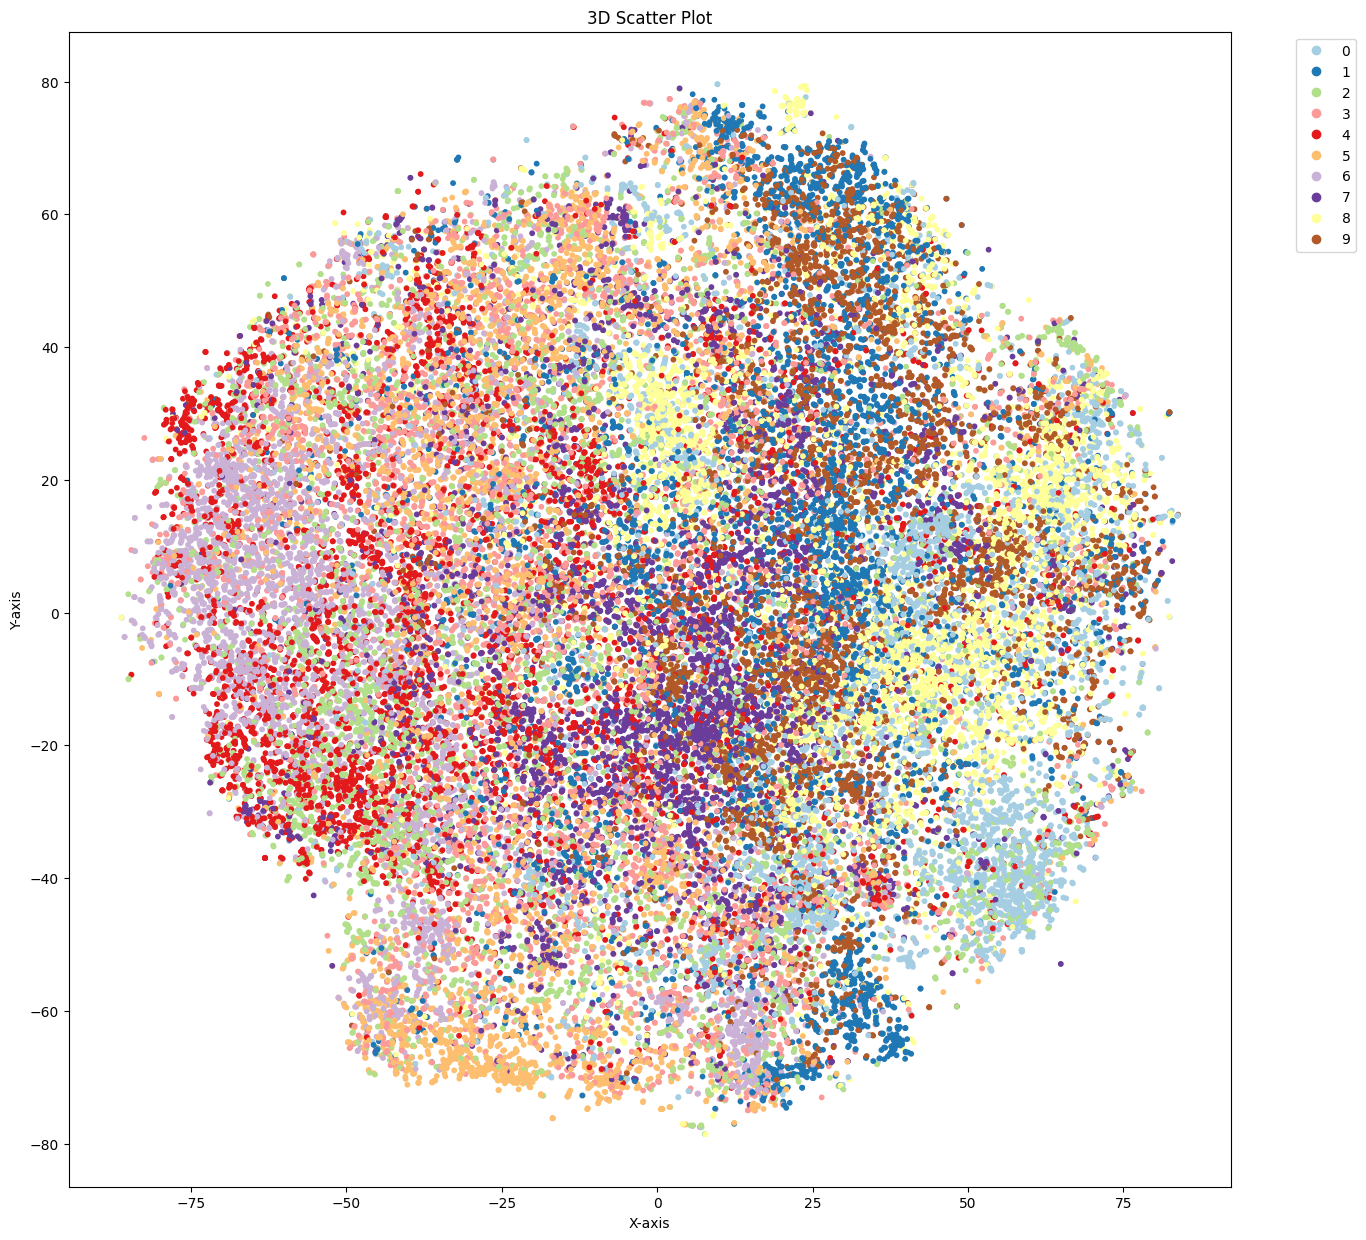

In [3]:
plot_tsne_points(tsne_points)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
def get_pairs(anchor_idx, points, labels, num_samples, distance):
    distances = np.linalg.norm(points - points[anchor_idx], axis=1)
    nearest_indices = np.argsort(distances)[1:distance*2]  # Exclude the anchor itself
    positive_idx = [ i for i in nearest_indices[-distance:] if labels[i] == labels[anchor_idx]]
    negative_idx = [ i for i in nearest_indices[:distance] if labels[i] != labels[anchor_idx]]
    
    if len(positive_idx) > num_samples and len(negative_idx) > num_samples:
        return positive_idx[:num_samples], negative_idx[:num_samples]
    else:
        return nearest_indices[:num_samples], nearest_indices[-num_samples:]


/tmp/ipykernel_130506/2368282063.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features = torch.tensor(features, dtype=torch.float32)  # shape: [N, D]


Epoch 1, Anchor 0: Loss 161.2867
Epoch 1, Anchor 1000: Loss 213.0630
Epoch 1, Anchor 2000: Loss 431.2954
Epoch 1, Anchor 3000: Loss 257.6008
Epoch 1, Anchor 4000: Loss 387.9710
Epoch 1, Anchor 5000: Loss 367.5831
Epoch 1, Anchor 6000: Loss 114.9570
Epoch 1, Anchor 7000: Loss 255.5571
Epoch 1, Anchor 8000: Loss 314.8389
Epoch 1, Anchor 9000: Loss 190.4456
Epoch 1, Anchor 10000: Loss 215.3723
Epoch 1, Anchor 11000: Loss 142.5691
Epoch 1, Anchor 12000: Loss 165.6992
Epoch 1, Anchor 13000: Loss 203.6046
Epoch 1, Anchor 14000: Loss 103.6656
Epoch 1, Anchor 15000: Loss 238.4654
Epoch 1, Anchor 16000: Loss 227.8339
Epoch 1, Anchor 17000: Loss 137.1927
Epoch 1, Anchor 18000: Loss 221.9169
Epoch 1, Anchor 19000: Loss 137.6251
Epoch 1, Anchor 20000: Loss 196.2927
Epoch 1, Anchor 21000: Loss 162.4052
Epoch 1, Anchor 22000: Loss 178.5421
Epoch 1, Anchor 23000: Loss 344.0414
Epoch 1, Anchor 24000: Loss 208.2074
Epoch 1, Anchor 25000: Loss 152.8808
Epoch 1, Anchor 26000: Loss 137.3105
Epoch 1, Ancho

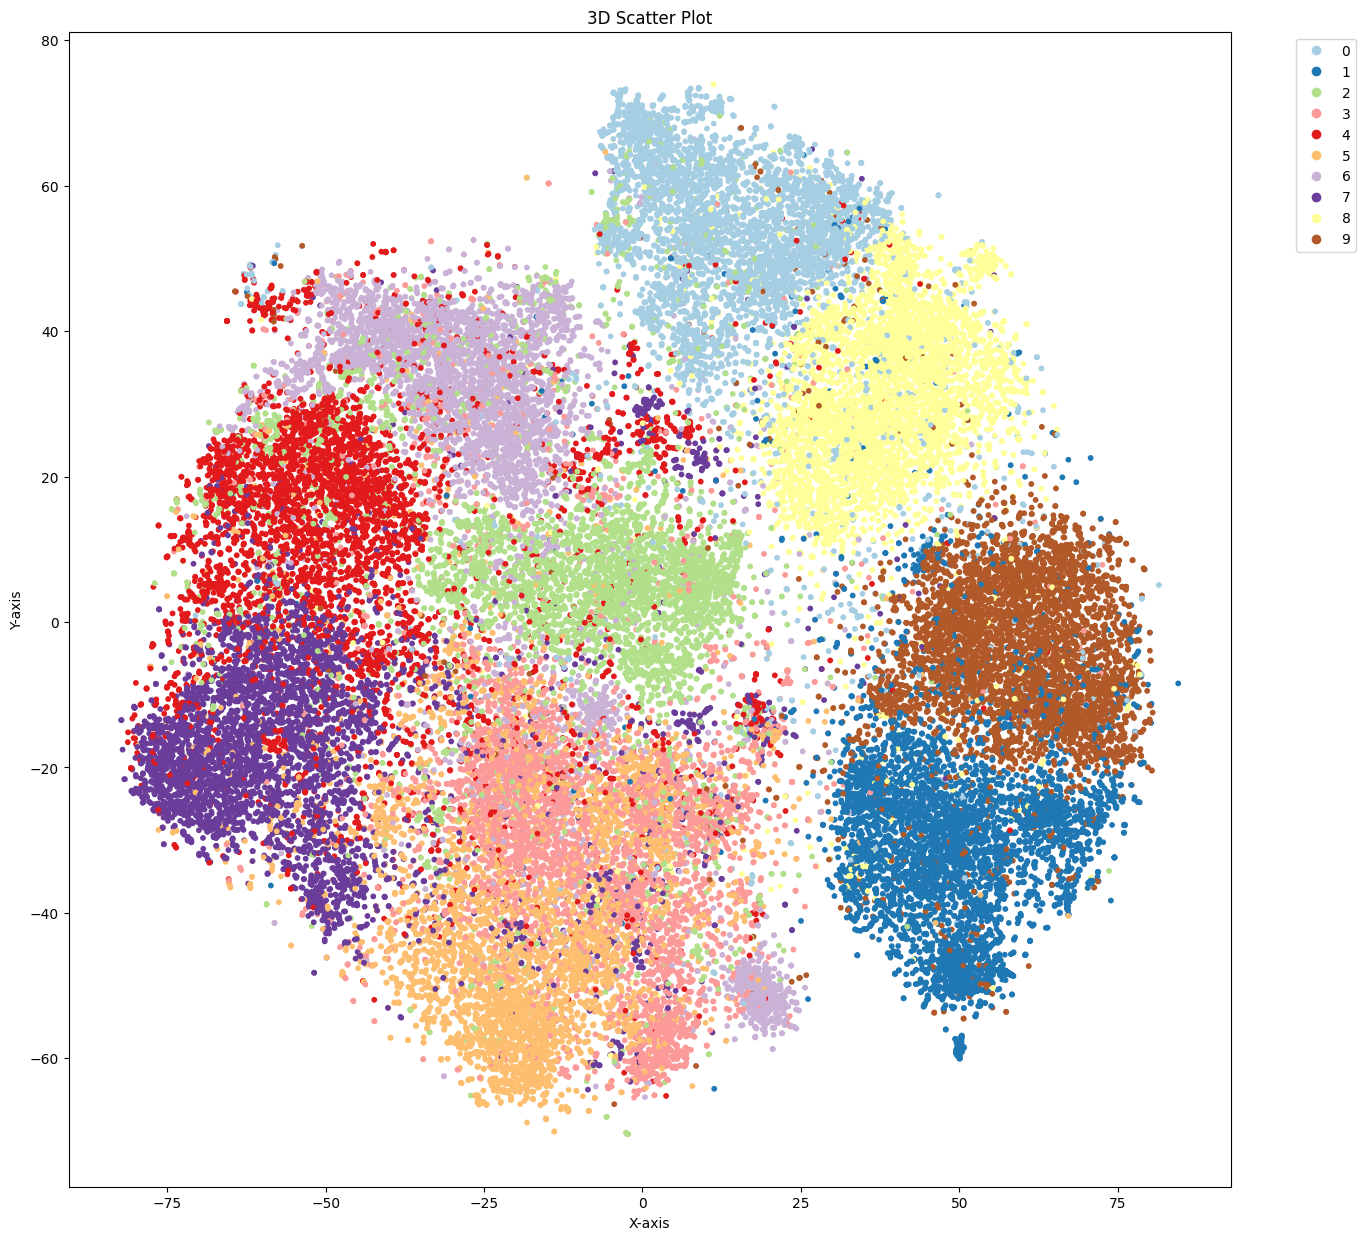

Epoch 2, Anchor 0: Loss 78.4595
Epoch 2, Anchor 1000: Loss 127.5771
Epoch 2, Anchor 2000: Loss 237.4961
Epoch 2, Anchor 3000: Loss 168.6390
Epoch 2, Anchor 4000: Loss 254.6656
Epoch 2, Anchor 5000: Loss 204.9389
Epoch 2, Anchor 6000: Loss 83.1108
Epoch 2, Anchor 7000: Loss 135.9535
Epoch 2, Anchor 8000: Loss 130.2857
Epoch 2, Anchor 9000: Loss 116.0315
Epoch 2, Anchor 10000: Loss 166.1713
Epoch 2, Anchor 11000: Loss 156.2344
Epoch 2, Anchor 12000: Loss 127.0024
Epoch 2, Anchor 13000: Loss 152.3177
Epoch 2, Anchor 14000: Loss 106.7749
Epoch 2, Anchor 15000: Loss 156.9443
Epoch 2, Anchor 16000: Loss 119.1708
Epoch 2, Anchor 17000: Loss 66.4579
Epoch 2, Anchor 18000: Loss 148.0063
Epoch 2, Anchor 19000: Loss 50.1743
Epoch 2, Anchor 20000: Loss 107.5699
Epoch 2, Anchor 21000: Loss 89.8649
Epoch 2, Anchor 22000: Loss 141.0149
Epoch 2, Anchor 23000: Loss 247.8876
Epoch 2, Anchor 24000: Loss 78.6627
Epoch 2, Anchor 25000: Loss 83.6441
Epoch 2, Anchor 26000: Loss 87.0703
Epoch 2, Anchor 27000:

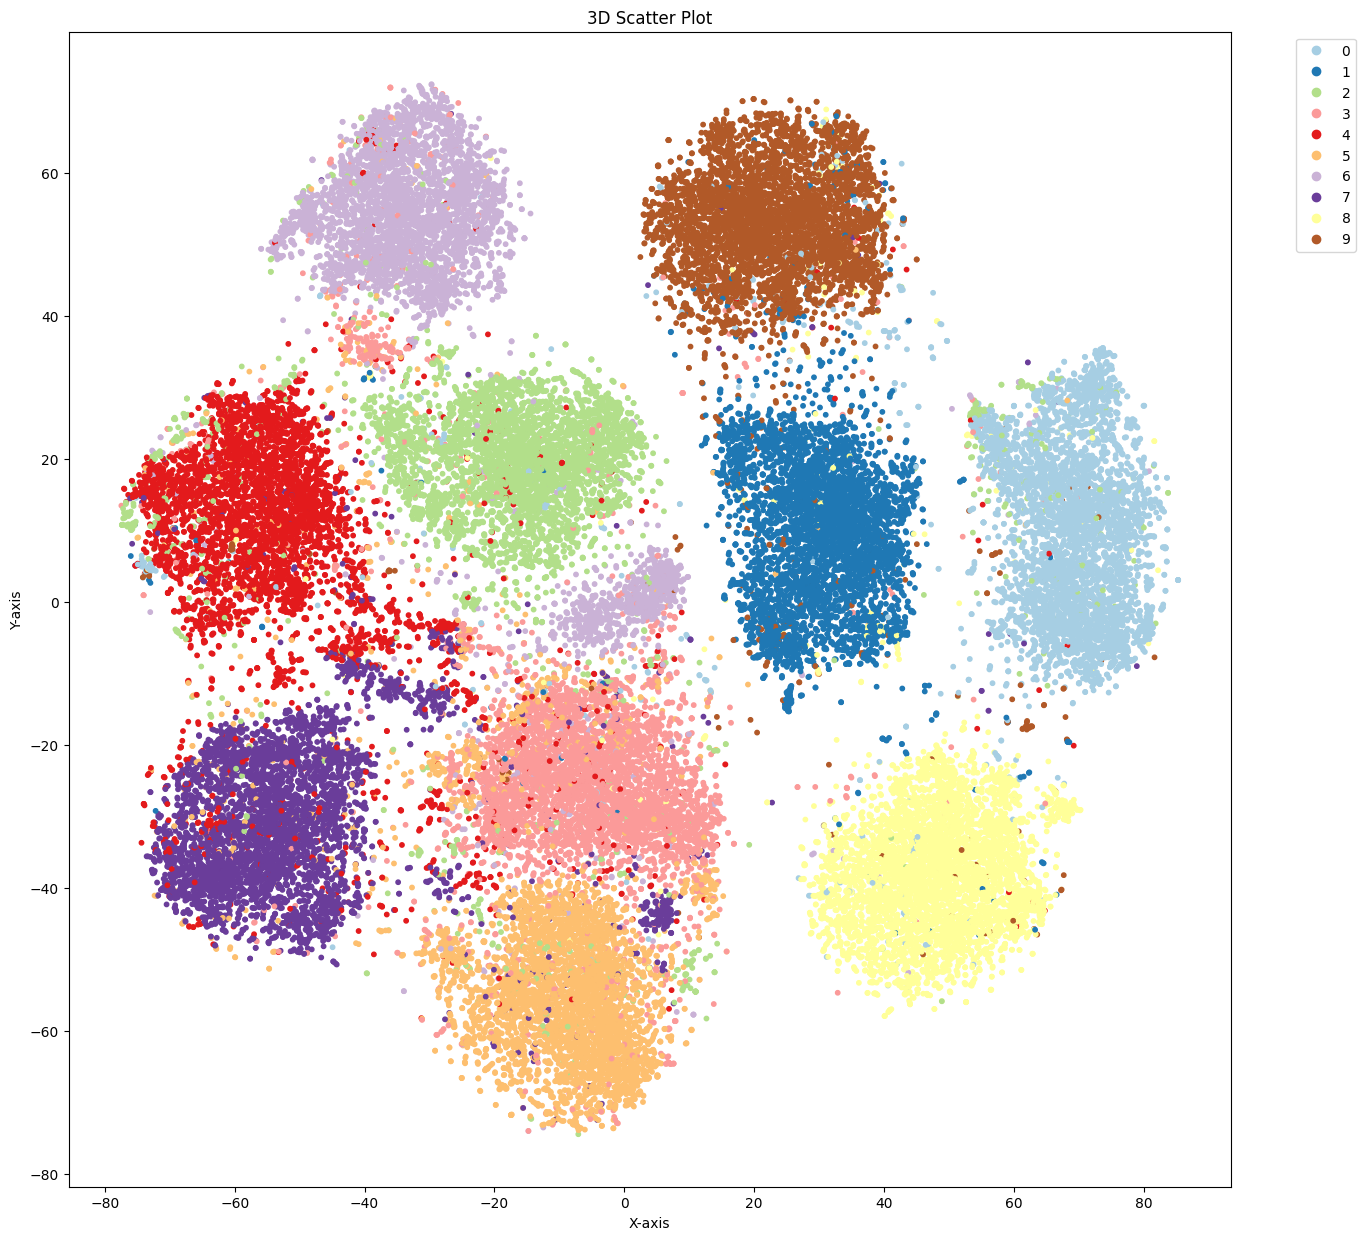

Epoch 3, Anchor 0: Loss 99.8869
Epoch 3, Anchor 1000: Loss 66.5381
Epoch 3, Anchor 2000: Loss 152.8043
Epoch 3, Anchor 3000: Loss 70.0612
Epoch 3, Anchor 4000: Loss 242.5207
Epoch 3, Anchor 5000: Loss 80.5806
Epoch 3, Anchor 6000: Loss 19.8076
Epoch 3, Anchor 7000: Loss 128.1359
Epoch 3, Anchor 8000: Loss 84.3081
Epoch 3, Anchor 9000: Loss 53.1635
Epoch 3, Anchor 10000: Loss 137.8914
Epoch 3, Anchor 11000: Loss 86.6520
Epoch 3, Anchor 12000: Loss 26.3210
Epoch 3, Anchor 13000: Loss 76.6059
Epoch 3, Anchor 14000: Loss 79.9018
Epoch 3, Anchor 15000: Loss 33.3011
Epoch 3, Anchor 16000: Loss 97.9543
Epoch 3, Anchor 17000: Loss 66.3460
Epoch 3, Anchor 18000: Loss 54.1116
Epoch 3, Anchor 19000: Loss 10.3653
Epoch 3, Anchor 20000: Loss 81.4007
Epoch 3, Anchor 21000: Loss 65.2151
Epoch 3, Anchor 22000: Loss 71.4612
Epoch 3, Anchor 23000: Loss 105.0729
Epoch 3, Anchor 24000: Loss 41.9333
Epoch 3, Anchor 25000: Loss 62.4718
Epoch 3, Anchor 26000: Loss 96.8635
Epoch 3, Anchor 27000: Loss 66.4693


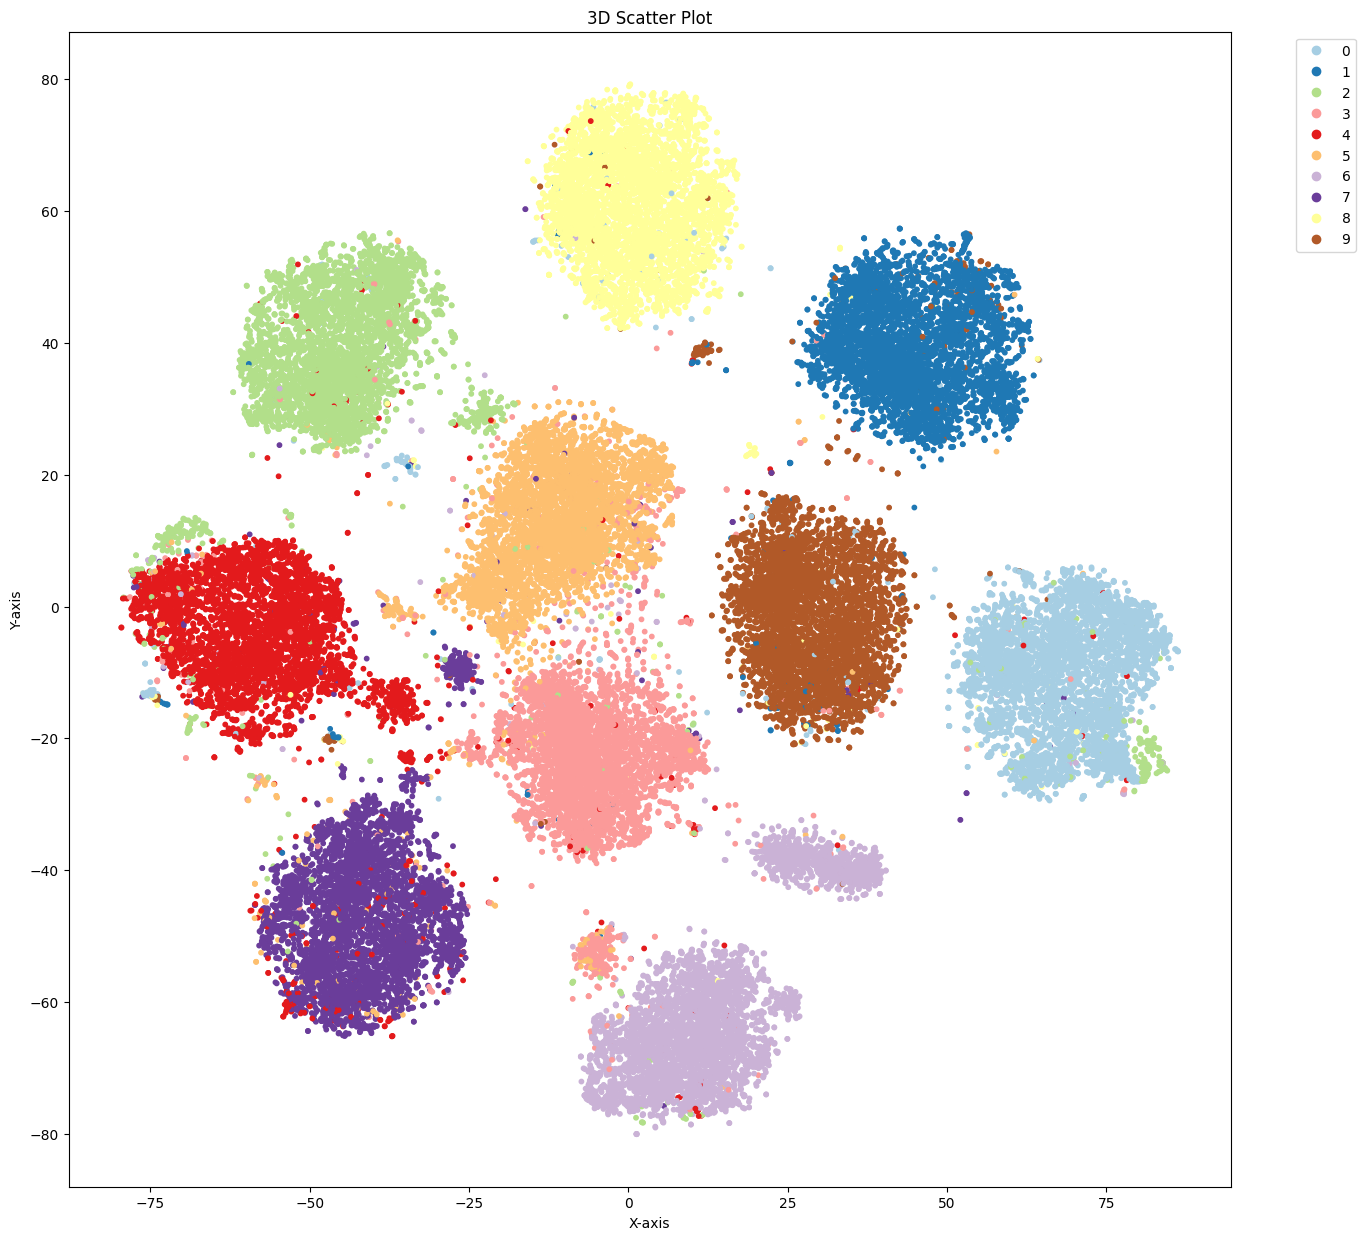

Epoch 4, Anchor 0: Loss 198.2779
Epoch 4, Anchor 1000: Loss 77.6972
Epoch 4, Anchor 2000: Loss 71.7578
Epoch 4, Anchor 3000: Loss 54.5471
Epoch 4, Anchor 4000: Loss 122.2748
Epoch 4, Anchor 5000: Loss 122.9060
Epoch 4, Anchor 6000: Loss 146.0411
Epoch 4, Anchor 7000: Loss 49.1266
Epoch 4, Anchor 8000: Loss 34.5597
Epoch 4, Anchor 9000: Loss 67.7815
Epoch 4, Anchor 10000: Loss 41.5038
Epoch 4, Anchor 11000: Loss 30.2410
Epoch 4, Anchor 12000: Loss 77.2380
Epoch 4, Anchor 13000: Loss 43.1149
Epoch 4, Anchor 14000: Loss 48.3656
Epoch 4, Anchor 15000: Loss 47.2675
Epoch 4, Anchor 16000: Loss 42.9182
Epoch 4, Anchor 17000: Loss 75.4737
Epoch 4, Anchor 18000: Loss 18.3641
Epoch 4, Anchor 19000: Loss 121.4417
Epoch 4, Anchor 20000: Loss 47.4917
Epoch 4, Anchor 21000: Loss 14.7486
Epoch 4, Anchor 22000: Loss 42.0262
Epoch 4, Anchor 23000: Loss 44.9086
Epoch 4, Anchor 24000: Loss 33.1221
Epoch 4, Anchor 25000: Loss 48.3347
Epoch 4, Anchor 26000: Loss 34.7989
Epoch 4, Anchor 27000: Loss 15.5880


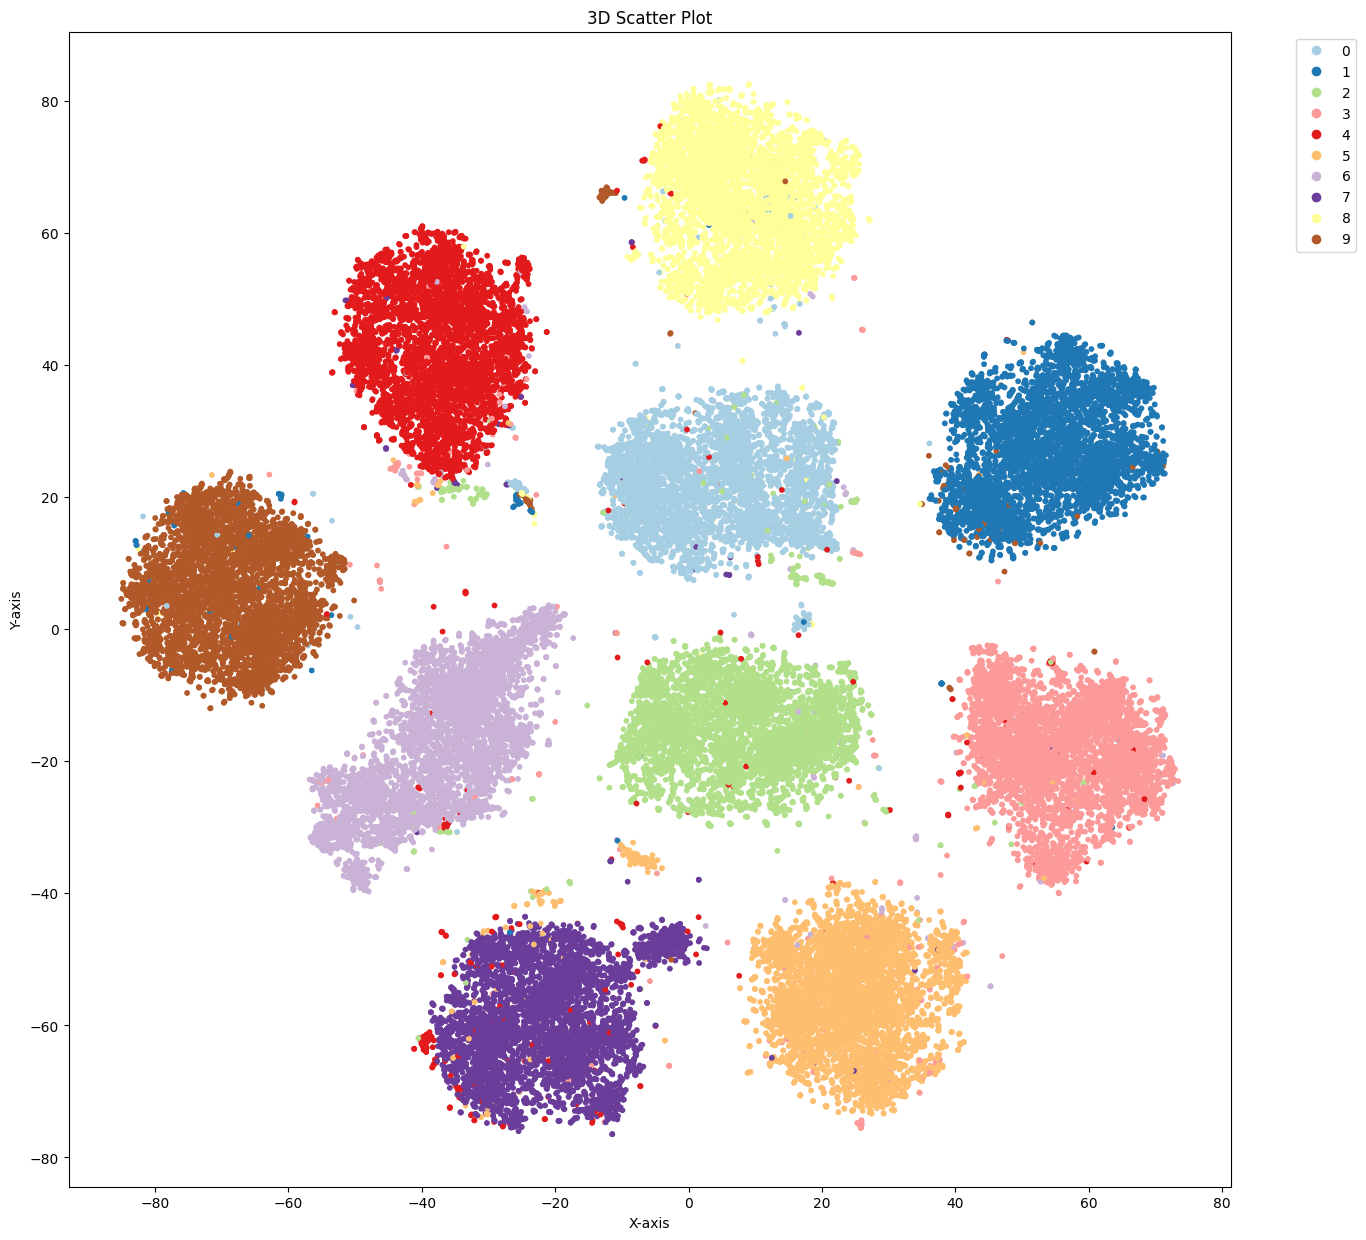

Epoch 5, Anchor 0: Loss 114.0502
Epoch 5, Anchor 1000: Loss 22.3481
Epoch 5, Anchor 2000: Loss 100.8842
Epoch 5, Anchor 3000: Loss 15.4141
Epoch 5, Anchor 4000: Loss 63.5962
Epoch 5, Anchor 5000: Loss 60.1740
Epoch 5, Anchor 6000: Loss 21.4559
Epoch 5, Anchor 7000: Loss 14.1628
Epoch 5, Anchor 8000: Loss 28.9393
Epoch 5, Anchor 9000: Loss 12.2182
Epoch 5, Anchor 10000: Loss 15.1686
Epoch 5, Anchor 11000: Loss 14.9065
Epoch 5, Anchor 12000: Loss 27.5561
Epoch 5, Anchor 13000: Loss 19.8735
Epoch 5, Anchor 14000: Loss 9.0506
Epoch 5, Anchor 15000: Loss 36.7653
Epoch 5, Anchor 16000: Loss 25.7743
Epoch 5, Anchor 17000: Loss 122.0599
Epoch 5, Anchor 18000: Loss 8.7914
Epoch 5, Anchor 19000: Loss 14.1436
Epoch 5, Anchor 20000: Loss 29.9173
Epoch 5, Anchor 21000: Loss 12.5039
Epoch 5, Anchor 22000: Loss 7.8947
Epoch 5, Anchor 23000: Loss 44.3951
Epoch 5, Anchor 24000: Loss 17.8156
Epoch 5, Anchor 25000: Loss 30.3114
Epoch 5, Anchor 26000: Loss 28.2539
Epoch 5, Anchor 27000: Loss 21.1636
Epoch

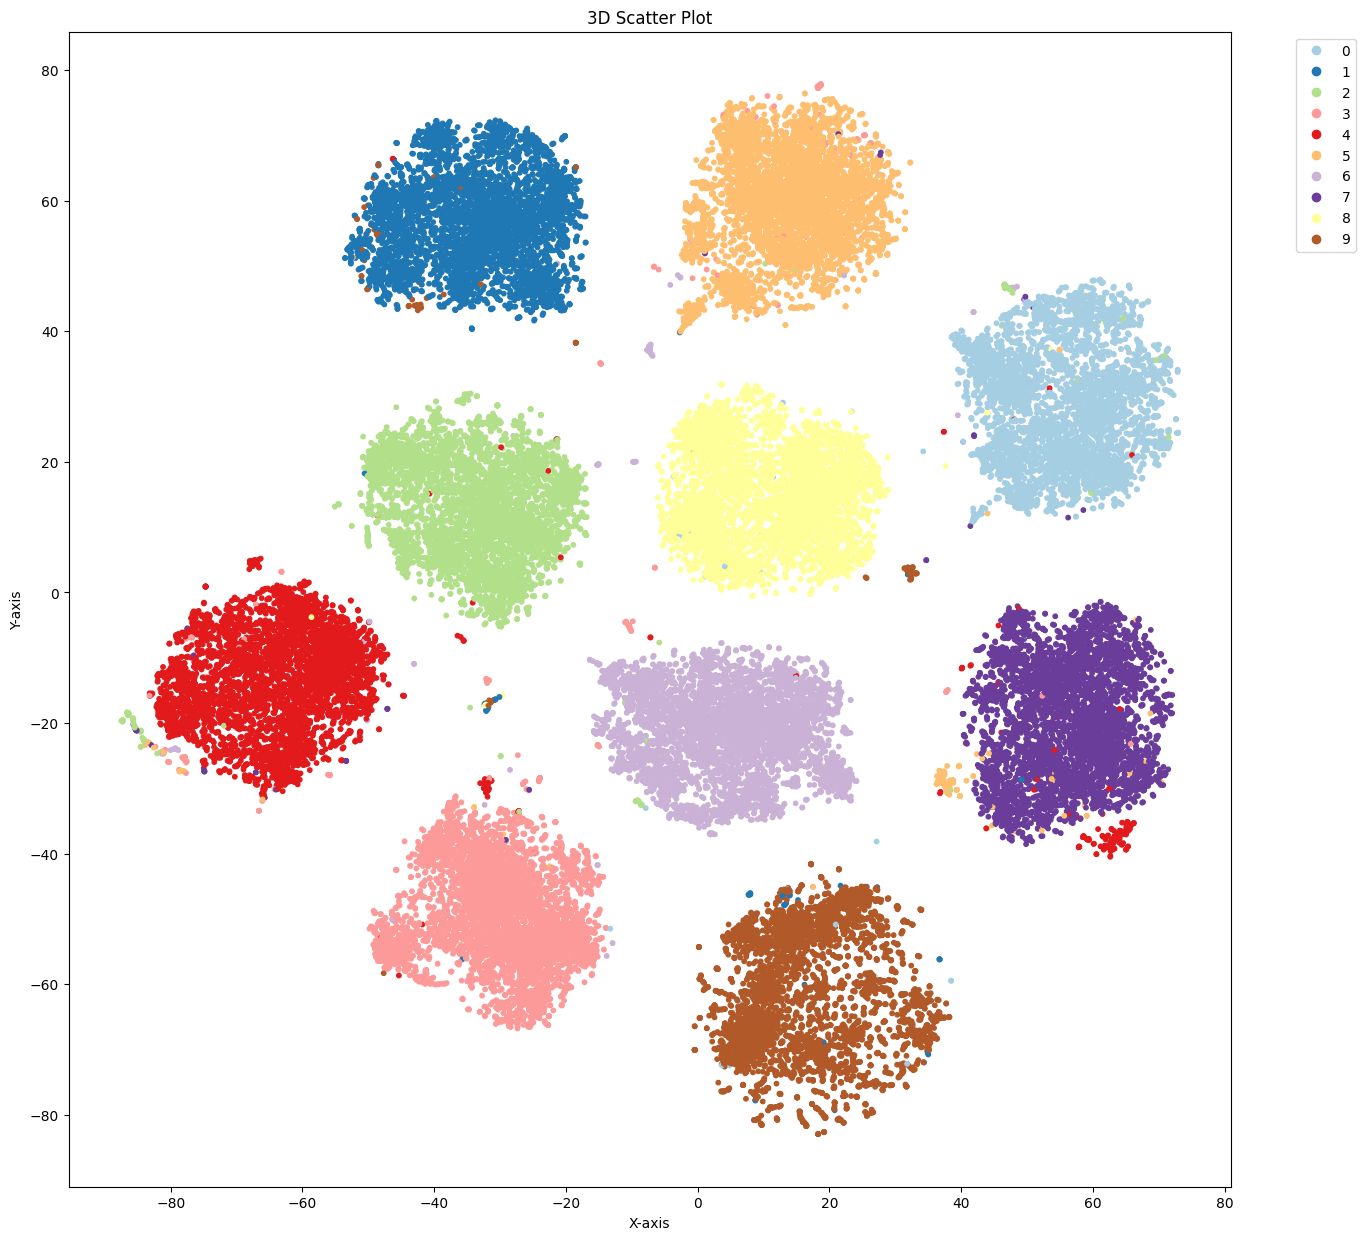

In [7]:
import torch
import torch.nn.functional as F

# Assume features and labels are loaded and are numpy arrays
features = torch.tensor(features, dtype=torch.float32)  # shape: [N, D]
labels = torch.tensor(dataset.targets)  # shape: [N]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
features = features.to(device)
labels = labels.to(device)

def pair_contrastive_loss(anchor_feat, other_feat, label, margin=1.0):
    distances = F.pairwise_distance(anchor_feat, other_feat)
    loss = label * distances.pow(2) + (1 - label) * F.relu(margin - distances).pow(2)
    return loss.mean()

optimizer = torch.optim.Adam([features.requires_grad_()], lr=1e-3)

epochs = 5
for epoch in range(epochs):
    total_loss = 0
    for anchor_idx in range(len(features)):
        anchor_feat = features[anchor_idx].unsqueeze(0)
        
        """
        if anchor_idx < 5000:
            pos_indices, neg_indices = get_pairs_al(anchor_idx, labels)
        else:
            pos_indices, neg_indices = get_pairs_nn(anchor_idx, tsne_points)
        """
        pos_indices, neg_indices = get_pairs(anchor_idx, tsne_points, labels, 5, 5000)

        pos_feats = features[pos_indices]
        neg_feats = features[neg_indices]

        loss_pos = pair_contrastive_loss(anchor_feat.repeat(len(pos_feats), 1), pos_feats, label=1)
        loss_neg = pair_contrastive_loss(anchor_feat.repeat(len(neg_feats), 1), neg_feats, label=0)
        loss = loss_pos + loss_neg

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if anchor_idx % 1000 == 0:
            print(f"Epoch {epoch+1}, Anchor {anchor_idx}: Loss {loss.item():.4f}")

    print(f"Epoch {epoch+1} Average Loss: {total_loss / len(features):.4f}")
    tsne = TSNE(n_components=2)
    tsne_points = tsne.fit_transform(features.detach().cpu().numpy())
    plot_tsne_points(tsne_points)

/tmp/ipykernel_130506/661589854.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(df['x'], df['y'], cmap='Paired', s=10, alpha=1)
/home/bshimura/miniconda3/envs/data-env/lib/python3.9/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


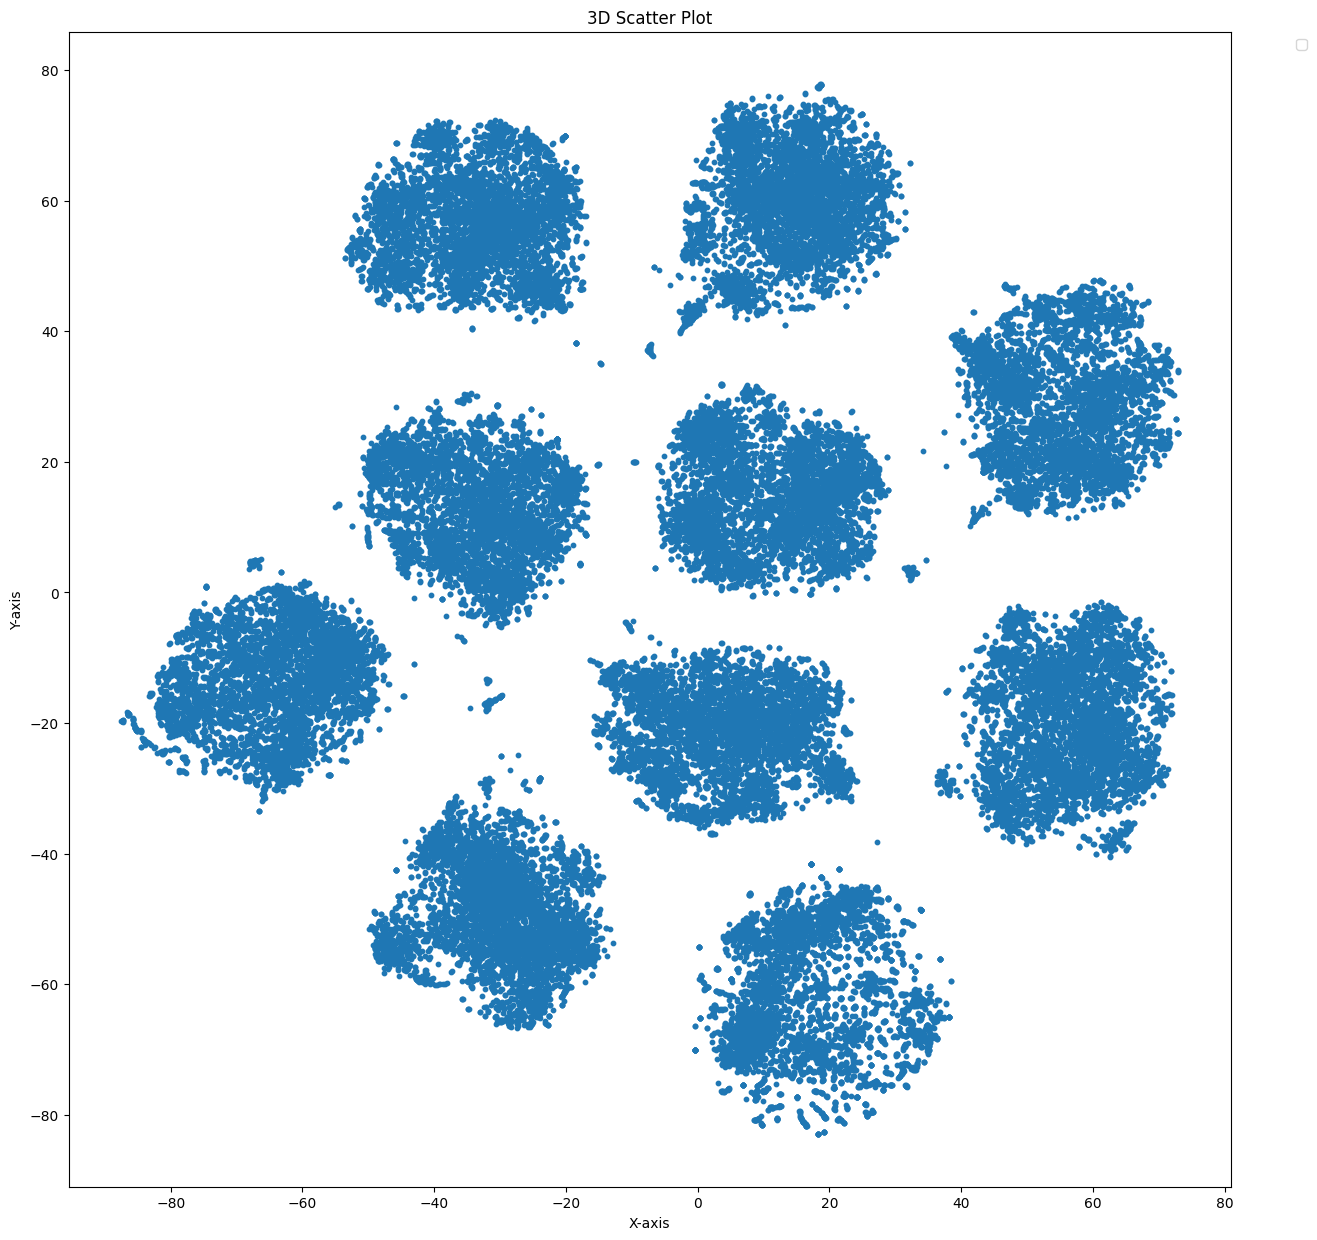

In [8]:
data = {'x': tsne_points[:,0], 'y': tsne_points[:,1]}
df = pd.DataFrame(data=data)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sc = ax.scatter(df['x'], df['y'], cmap='Paired', s=10, alpha=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Scatter Plot')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()